# Initialization Techniques for Deep Learning.
In this code, we train a 3- Layered Neural Network on a planar dataset(imported from sklearn) and see their performance with different types of initialization techniques.
The three initialization techniques discuused are:
1) Zero initialization of weights.
2) Random Initialization.
3) He- initialization.

# Importing Dataset

In [88]:
# First we will import some python libraries to be used.
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets

In [89]:
def load_dataset():
    np.random.seed(1)  # This method is used to ensure that whenever we use random numbers, they are same. Whenever we run this code, same samples are stored in training data.
    train_X, train_Y = sklearn.datasets.make_circles(n_samples=300, noise=.05) # This code loads training dataset in train_X and train_Y numpy arrays. Noise is the amount of Gaussian Noise to be added.
    # There are many available datasets in sklearn which we can import for different types of problems.  
    np.random.seed(2) # To ensure same samples are stored in test data.
    test_X, test_Y = sklearn.datasets.make_circles(n_samples=100, noise=.05)
    
    # Visualize the data
    plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=50, cmap=plt.cm.Spectral); # First parameter passed is a column of  features X1 of size 300*1. Second parameter is feature X2 vector.
    # c=train_Y is output vector having 0(red) and 1(blue) representing 1 color each. s represents the size of the dots. cmap=plt.cm.Spectral for setting colors of dots.
    train_X = train_X.T
    train_Y = train_Y.reshape((1, train_Y.shape[0]))
    test_X = test_X.T
    test_Y = test_Y.reshape((1, test_Y.shape[0]))
    return train_X, train_Y, test_X, test_Y

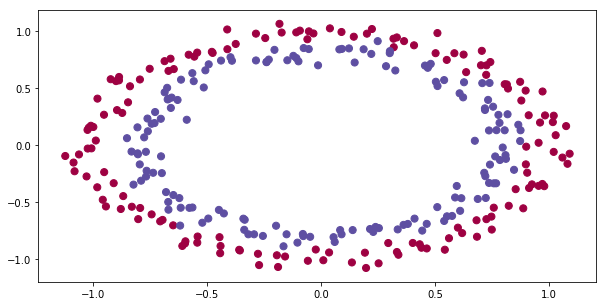

In [90]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 5.0) # sets width(10) and height(5.0) of the figure
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
train_X, train_Y, test_X, test_Y = load_dataset()

In [91]:
print(train_X.shape) # Examples are in column form i.e. each column represents each example. Each example has 2 features i.e. co-ordinates in cartesian plane.
print(train_Y.shape) 

(2, 300)
(1, 300)


# Zero Initialization
Below, we will write a function that initializes all the parameters(W1,b1,W2,b2,W3,b3 etc.) to all zeros.


In [92]:
def initialize_parameters_zeros(layers_dims):
    """Parameter: layers_dims is a python list having number of neurons in each layer. Example: First element is number of neurons in input layers. 
         Second element is number of neurons in first hidden layer and last element is number of neurons in output layer. """
    parameters={}  # initializing an empty dictionary to store parameters.
    L=len(layers_dims) # Total number of layers in the neural network.
    
    for l in range(1,L):
        parameters['W' + str(l)] = np.zeros((layers_dims[l],layers_dims[l-1])) # Parameter matrix W[l] mapping layer l-1 and l will be of shape layer_dims[l] * layer_dims[l-1] 
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1)) # Bias parameter vector b[l] mapping layer l-1 and l will be of shape layer_dims[l] * 1. 
        
        
    return parameters

# Random Initialization

Below we will write a function that initailizes the parameter matrix W[l] mapping layer l-1 to l as random values. and vector b[l] as all zero values.


In [93]:
def initialize_parameters_random(layers_dims):
    """Parameter: layers_dims is same as in the function initialize_parameters_zeros"""
    parameters={}
    L=len(layers_dims)
    
    for l in range(1,L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * 10  # np.random.randn generates random numbers from standard normal distribution. We multiply by 10 to have standard deviation of 10.
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
        
   
    return parameters    

# HE Initialization.

The concept of He Initiazation is given by the first author of paper He et al., 2015. It is very uch similar of Xavier initilization which uses a scaling factor for the weights W[l] of sqrt(1./layers_dims[l-1]) whereas He initialization would use sqrt(2./layers_dims[l-1]).

We will write a function that initializes parameters according to He initialization. It is same as random initialization. Now, instead of multiplying by 10, we will multiply by sqrt(2./layers_dims[l-1]).

In [122]:
def initialize_parameters_he(layers_dims):
    
    """Parameter: layers_dims is same as in the function initialize_parameters_zeros"""
    parameters={}
    L=len(layers_dims)
        
    for l in range(1,L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(2/layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1)) 
            
        
    return parameters

# Xavier Initialization

In [127]:
def initialize_parameters_xavier(layers_dims):
    
    """Parameter: layers_dims is same as in the function initialize_parameters_zeros"""
    parameters={}
    L=len(layers_dims)
        
    for l in range(1,L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(1/layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1)) 
            
        
    return parameters

# Model training
Now we will train a 3 layered neural network using a model function. And then use the above 3 initialization techniques one by one and see how they work.
Before writing model function, let us write the helper functions like activation functions, forward propagation, backward propogation, update parameters(to perform gradient descent) which will be used by model function to find optimized values of the parameters. 

In [95]:
def sigmoid(x):
    """This function computers sigmoid of x which can be scalar or numpy array of any size.
         If x is array of any size, the function computes element wise sigmoid. """
    s=1/(1+np.exp(-x))
    
    return s

In [96]:
def relu(x):
    """This function computes relu of x. Again x can be a scalar or a numpy array."""
    r=np.maximum(0,x)
    
    return r

# Forward Propagation

In [97]:
def forward_propagation(X,parameters):
    
    # retriving parameters from the python dictionary.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # Computing First layer which is a Relu activated layer.
    z1 = np.dot(W1,X) + b1  # X is matrix where each column represents an example. So, after this computation, z1 is also a matrix, where first column represents first layer(linear) of first training example.
    # Second column represents first layer(linear part ) of second example and so on.
    a1 = relu(z1) # a1 has same dimensions as z1. Now, each column of a1 represents first activated layer of each example.
    
    # Computing Second hidden layer.
    z2 = np.dot(W2,a1) + b2
    a2 = relu(z2)
    
    # Computing Output layer:
    z3 = np.dot(W3,a2) + b3
    a3 = sigmoid(z3)  # a3 has 1 row and m( number of examples) columns where each column represent y_hat
    
    cache = (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3) # Storing all activation layers in cache tuple which will be used in backpropagation.
    
    return a3, cache

# Back Propagation
Below code implements back-propagation. To understand the code below, some knowledge about computation graphs and backpropagation algorithm and vector calculus is required.

In [98]:
def backward_propagation(X, Y, cache):
    """
    This function implements back propagation to calculate gradients dW's and db's. 
    
    """
    m = X.shape[1]  # Number of training examples.
    (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3) = cache # Retrieving activations and parameters from cache.
    
    dz3 = 1./m * (a3 - Y) # dz3 is derivative of Loss wrt z3. It can be calculated directly subtracting y_hat and y for all examples.
    dW3 = np.dot(dz3, a2.T) # dW3 is derivative of Loss wrt W3.
    db3 = np.sum(dz3, axis=1, keepdims = True) # db3 is derivative wrt 
    
    da2 = np.dot(W3.T, dz3)
    dz2 = np.multiply(da2, np.int64(a2 > 0))
    dW2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis=1, keepdims = True)
    
    da1 = np.dot(W2.T, dz2)
    dz1 = np.multiply(da1, np.int64(a1 > 0))
    dW1 = np.dot(dz1, X.T)
    db1 = np.sum(dz1, axis=1, keepdims = True)
    
    gradients = {"dz3": dz3, "dW3": dW3, "db3": db3,
                 "da2": da2, "dz2": dz2, "dW2": dW2, "db2": db2,
                 "da1": da1, "dz1": dz1, "dW1": dW1, "db1": db1}
    
    return gradients

# Gradient Descent Update 

In [99]:
def update_parameters(parameters, grads, learning_rate):
    """
   This function updates parameters using gradient descent algorithm.

    """
    
    L = len(parameters) // 2 # number of layers in the neural networks

    # Update rule for each parameter
    for k in range(L):
        parameters["W" + str(k+1)] = parameters["W" + str(k+1)] - learning_rate * grads["dW" + str(k+1)]
        parameters["b" + str(k+1)] = parameters["b" + str(k+1)] - learning_rate * grads["db" + str(k+1)]
        
    return parameters


# Loss Function
The function below computes loss using sigmoid loss function (also called cross-entropy loss function). 

In [113]:
def compute_loss(a3,Y):
    m = Y.shape[1]
    logprobability = - np.multiply(Y, np.log(a3)) - np.multiply(1-Y, np.log(1-a3))
    loss = 1./m * np.nansum(logprobability) # To avoid nan scenario i.e. treats Nan as zero.
    
    return loss

# Predict Function

The function below predicts the value of y for an example(or test data) using forward propagation.

In [114]:
def predict(X,y,parameters):
    m = X.shape[1]
    p = np.zeros((1,m), dtype = np.int) # Initializing predicted value vector y_hat corresponding to X
    
    # Forward Propagation
    a3,cache = forward_propagation(X , parameters)
    
    # Converting probabilties to 0/1 using 0.5 as threshold.
    for i in range(0,a3.shape[1]):
        if ( a3[0,i] > 0.5):
            p[0,i] = 1
        else:
            p[0,i] = 0
            
     
    # Printing the accuracy
    print("Accuracy of the model is : " + str(np.mean((p[0,:]==y[0,:]))))
    
    return p
             

# Plotting Decision Boundary

In [107]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1  # Calculating the minimum and maximum value of  x co-ordinate of  cartesian plane and giving a padding of 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1  # Similarly for y co-ordinate of cartesain plane.
    
    h = 0.01
    
    # Generate a grid of points with distance h between them
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))  # Returns co-ordinate matrices from co-ordinate vectors.
    
    # Predict the function value for every x1,y1 pair on the grid
    
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour(shaded region based on Z i.e. predicted value) and training examples.
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y[0,:], cmap=plt.cm.Spectral)
    plt.show()

In [108]:
def predict_dec(parameters, X):
    """
    Used for plotting decision boundary.
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Predict using forward propagation and a classification threshold of 0.5
    a3, cache = forward_propagation(X, parameters)
    predictions = (a3>0.5)
    return predictions


# Model to be trained.

In [128]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he"):
    """
   This function returns the parameters learnt by the model
    """
        
    grads = {}
    costs = [] # to keep track of the loss
    m = X.shape[1] # number of examples
    layers_dims = [X.shape[0], 10, 5, 1]
    
    # Initialize parameters dictionary.
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)
    elif initialization == "xavier":
        parameters = initialize_parameters_xavier(layers_dims)

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation:
        a3, cache = forward_propagation(X, parameters)
        
        # Loss
        cost = compute_loss(a3, Y)

        # Backward propagation.
        grads = backward_propagation(X, Y, cache)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 1000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
            
    # plot the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

# Training Model with zero initialization.

After running this model, you will see that zero initialization fails to break symmetry and Gradient descent updates all parameters same. This ends with a poor classifier that predicts everything as Zero.

Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599453
Cost after iteration 10000: 0.6931471805599455
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453


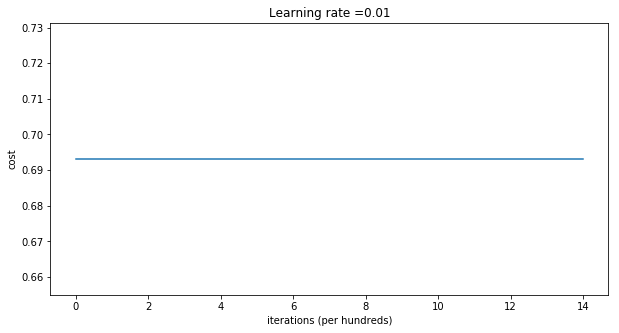

On the train set:
Accuracy of the model is : 0.5
On the test set:
Accuracy of the model is : 0.5


In [110]:
parameters = model(train_X, train_Y, initialization = "zeros")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

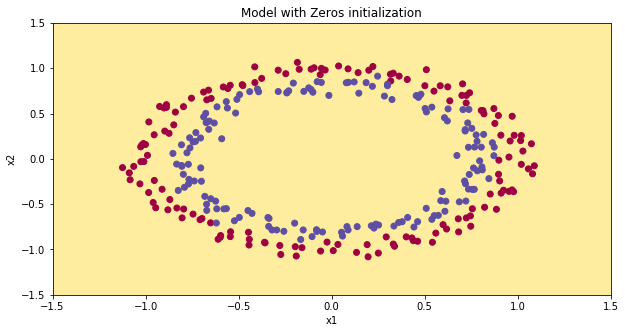

In [111]:
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

# Training Model with Random Initialization

After running the code, you can see that it performs much better than Zero Initialization.
Note: Every time we try to train the model, it lands at different values of parameters. Sometimes it may achieve very high accuracy and sometimes not very impressive accuracy. Also, initializing too large values is not good for the model.

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


Cost after iteration 0: inf
Cost after iteration 1000: 0.1464792729173924
Cost after iteration 2000: 0.03048949402677753
Cost after iteration 3000: 0.021278882199465728
Cost after iteration 4000: 0.01830518131804302
Cost after iteration 5000: 0.01157785975587695
Cost after iteration 6000: 0.010103805268028346
Cost after iteration 7000: 0.010025329705013766
Cost after iteration 8000: 0.009677665887582385
Cost after iteration 9000: 0.009435266546138708
Cost after iteration 10000: 0.00924073901915582
Cost after iteration 11000: 0.008727811512894215
Cost after iteration 12000: 0.008604411615398258
Cost after iteration 13000: 0.008479906994231698
Cost after iteration 14000: 0.008374448086994878


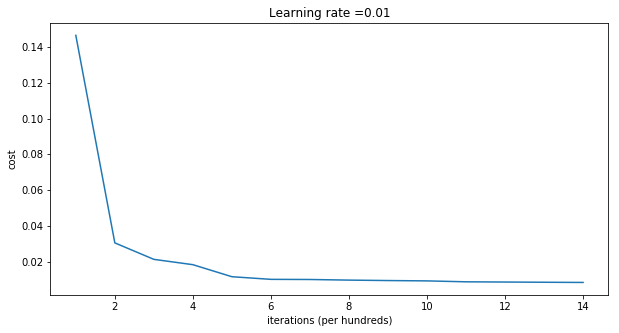

On the train set:
Accuracy of the model is : 0.996666666667
On the test set:
Accuracy of the model is : 0.93


In [119]:
parameters = model(train_X, train_Y, initialization = "random")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


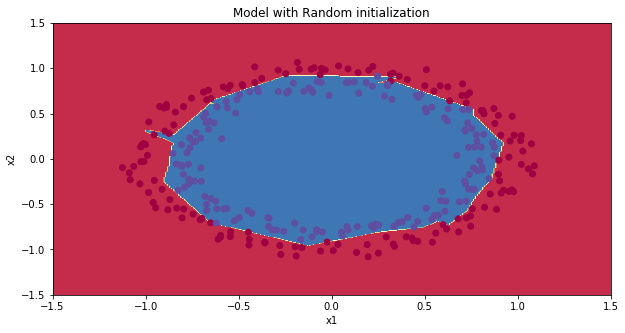

In [120]:
plt.title("Model with Random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

# Training Model With He Initialization:
After running this code, you will see that it performs even better than Random Initialization. 
We land up with different level of accuracy everytime we train but mostly the accuracy is high enough.

Cost after iteration 0: 0.7368217322921917
Cost after iteration 1000: 0.6767953720916817
Cost after iteration 2000: 0.6589581198800196
Cost after iteration 3000: 0.6321524234993128
Cost after iteration 4000: 0.5888081011320891
Cost after iteration 5000: 0.5341708181832254
Cost after iteration 6000: 0.4647305403746586
Cost after iteration 7000: 0.38779574597760635
Cost after iteration 8000: 0.3119028871631729
Cost after iteration 9000: 0.24973736401997038
Cost after iteration 10000: 0.20399366908077904
Cost after iteration 11000: 0.17084288626209596
Cost after iteration 12000: 0.14635332827340686
Cost after iteration 13000: 0.12633589097549636
Cost after iteration 14000: 0.11229253994871077


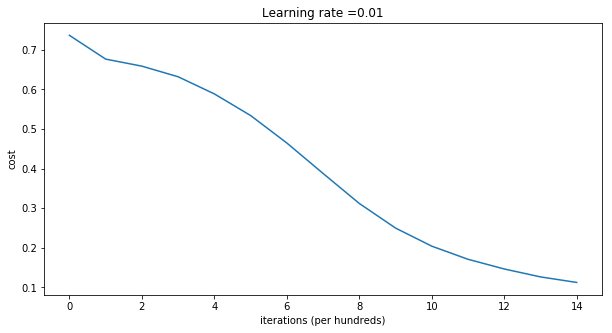

On the train set:
Accuracy of the model is : 0.976666666667
On the test set:
Accuracy of the model is : 0.93


In [125]:
parameters = model(train_X, train_Y, initialization = "he")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

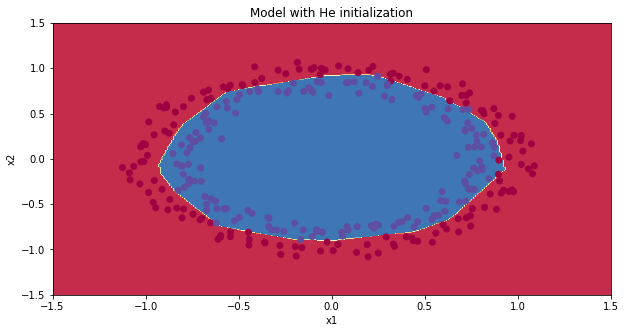

In [126]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

# Training Model with Xavier Initialization:

Cost after iteration 0: 0.7087487170403557
Cost after iteration 1000: 0.6908207433585771
Cost after iteration 2000: 0.6822365438148159
Cost after iteration 3000: 0.6714669917494929
Cost after iteration 4000: 0.6478585799364195
Cost after iteration 5000: 0.6087062916848126
Cost after iteration 6000: 0.5285306413809203
Cost after iteration 7000: 0.40498407436285877
Cost after iteration 8000: 0.28419482370437743
Cost after iteration 9000: 0.2020427691376472
Cost after iteration 10000: 0.15135067417257367
Cost after iteration 11000: 0.11846824261959943
Cost after iteration 12000: 0.09740955813244057
Cost after iteration 13000: 0.08318858878005837
Cost after iteration 14000: 0.07305804067434515


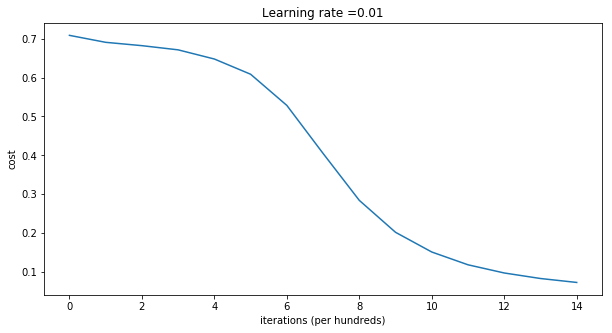

On the train set:
Accuracy of the model is : 0.986666666667
On the test set:
Accuracy of the model is : 0.96


In [129]:
parameters = model(train_X, train_Y, initialization = "xavier")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

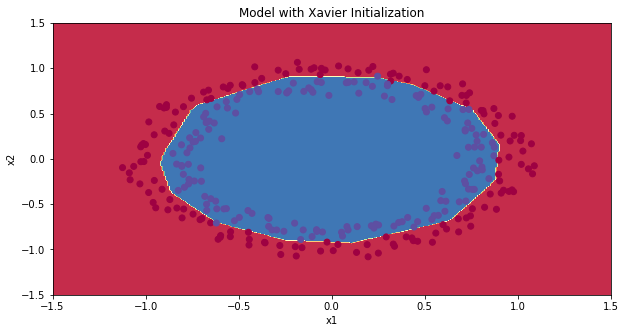

In [130]:
plt.title("Model with Xavier Initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)